# Модуль А. Анализ и предобработка данных

## Импортирование библиотек

In [1]:
# библиотека для разархивации данных
import zipfile

# библиотека для работы с данными
import pandas as pd

# библиотека для визуализации данных
import matplotlib.pyplot as plt

## Загрузка данных

Для того чтобы начать работать с данными, надо разархивировать их из архива `archive.zip`

In [4]:
path1_to_zip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_det\archive.zip'  # путь к архиву для детектирования лиц
path1_to_unzip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_det' # путь, куда будут разархивированы данные

path2_to_zip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_ind\archive.zip'  # путь к архиву для распознавания лиц
path2_to_unzip = r'D:\Helper\MLBazyak\homework\face_recognition\data\face_ind' # путь, куда будут разархивированы данные

with zipfile.ZipFile(path1_to_zip, 'r') as zip:   # открываем архив для детектирования лиц для чтения как zip
    zip.extractall(path1_to_unzip)            # загружаем все данные 

with zipfile.ZipFile(path2_to_zip, 'r') as zip:   # открываем архив для распознавания лиц для чтения как zip
    zip.extractall(path2_to_unzip)            # загружаем все данные 

После того, как все данные выгружены, можно начинать с ними работать

## Датасет для детекции лиц

**Структура данных в наборе:**


└── face_ind/    

        └── images/       # папка с фотографиями
            └── train/           # тренировочный набор
                └── 04013.png         # экземпляр фото
                └── 04111.png
                └── 04420.png
                └── 04837.png
                └── etc ...
            
        └── labels/       # папка с разметкой 
            └── train/           # тренировочный набор
                └── 04013.txt         # экземляр разметки в формате YOLO (txt файл)
                └── 04111.txt
                └── 04420.txt
                └── 04837.txt
                └── etc ...
        



для просмотра разметки я буду использовать `YOLO Annotation Tool` 

чтобы приступить к работе с ним, надо перейти на [репозиторий с YAT](https://github.com/Rainfue/YAT), загрузить его как архив, и разахрхивировать его себе на компьютер

*пример кода*
```py
with zipfile.ZipFile(r'C:\Users\user1\Project\face_recognition\Module1\YAT\YAT-main.zip', 'r') as zip:
    zip.extractall(r'C:\Users\user1\Project\face_recognition\Module1\YAT')
```

далее, надо запустить файл `Annotate.html` и приступить к работе

для того чтобы просматривать разметку, надо создать  `.txt` файл с классами (у нас 1 класс, лицо)

*вот так выглядит `classes.txt`:*

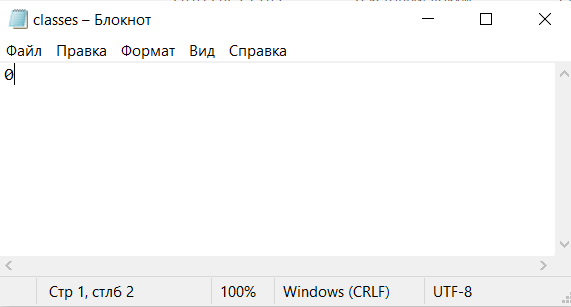

после этого, можно загрузить `txt` файл с классами, `фотографии` и `разметку` к ним, для того чтобы начать просматривать датасет

## Датасет для распознавания лиц

**Структура данных в наборе:**

└── face_ind/    

    ├── lfw-deepfunneled/
        └── lfw-deepfunneled/
            └── Aaron_Eckhart/                           # имя человека
                └── Aaron_Eckhart_0001.jpg               # экземпляр фото человека
            └── Aaron_Guiel/  
                └── Aaron_Guiel_0001.jpg                
            └── Aaron_Patterson/
                └── Aaron_Patterson_0001.jpg
            └── etc ...
            
    ├── lfw_allnames.csv                                 # csv файл с подсчетом колва фотографий на имя
    ├── lfw_readme.csv      
    ├── matchpairsDevTest.csv      
    ├── matchpairsDevTrain.csv      
    ├── mismatchpairsDevTest.csv      
    ├── mismatchpairsDevTrain.csv      
    ├── pairs.csv      
    ├── people.csv                                       # csv файл с подсчетом колва фотографий на имя   
    ├── peopleDevTest.csv      
    ├── peopleDevTrain.csv      
    ├── archive.zip                                      # изначальный архив с данными


загружаем `people.csv` как `DataFrame` используя библиотеку `pandas`, и вывожу первые 5 строчек

In [ ]:
df1 = pd.read_csv(r'C:\Users\user1\Project\face_recognition\Module1\data\people.csv', low_memory=False)
df1['images'] = df1['images'].fillna(0)  # заменяю все отсутствующие данные на 0
df1['images'] = df1['images'].astype(int)  # меняю тип данных на int
df1.head()

собрал все уникальные значения, удалил все повторения

In [ ]:
plt.plot(list(set(df1['images'].values)))
plt.show()